# Least Square Method - Polynomial

<a href="https://en.wikipedia.org/wiki/Linear_least_squares_(mathematics)">Wikipedia</a>
[Polynomial 수식 유도](http://mathworld.wolfram.com/LeastSquaresFittingPolynomial.html)

In [3]:
# https://en.wikipedia.org/wiki/Linear_least_squares_(mathematics)
# http://mathworld.wolfram.com/LeastSquaresFittingPolynomial.html
#Motivational_example

%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt

# retrun: [1 x x^2 ... x^k] (shape= (N,1+k))
def buildX(x, k):
    X = np.ones_like(x)
    for i in range(k):
        X = np.hstack((X, np.power(x, i + 1)))
    
    return np.matrix(X)

# return: compute polynomial (shape= (N,1))
def evaluate(a, x):
    y = np.zeros((x.shape[0], 1))
    
    for i in range(a.shape[0]):
        y += a[i, 0] * np.power(x, i)
        
    return y

# return: sum of squred error (shape= (1,1))
def sqrErr(d, o):
    return np.sum(np.power(d - o, 2), 0) / 2.

def fit(X, y):
    
    a = np.linalg.inv(X.T.dot(X)).dot(X.T).dot(y)
    return a

def plot(input, a):
    k = a.shape[0] - 1;
    fig = plt.figure()
    ax = fig.add_subplot(111)
    ax.set_title(u'Fit Polynomial Fn, $k = %d$' % k, fontsize=20)
    ax.set_xlabel(u'$x$', fontsize=15)
    ax.set_ylabel(u'$y$', fontsize=15, rotation='horizontal')
    ax.text(1.05, 1, '\n'.join('$a_%d = %f$' % (i, a[i]) for i in range(k+1)), 
            transform=ax.transAxes, verticalalignment='top', fontsize=15)

    xx = np.linspace(0, 5)
    yy = evaluate(a, np.matrix(xx).T)
    ax.plot(xx, yy, color='b')

    ax.scatter(input[:,0], input[:,1], color='r')
    
    o = evaluate(a, np.matrix(input[:, 0]))
    
    err = sqrErr(np.matrix(input[:, 1]), o)
    
    ax.text(0.5, 0.9, u'$E = %f$' % err, fontsize=15, transform=ax.transAxes)


In [2]:
# shape = (N,1+1)
input = np.matrix([
    [0, 2],
    [0.5, 6],
    [1, 6],
    [2, 5],
    [3, 7],
    [4, 10],
    #[5, 100],
])

# shape = (N,1)
x = input[:,0]

# shape = (N,1)
y = np.matrix(input[:,1])

X = 
[[ 1  0  0  0]
 [ 1  0  0  0]
 [ 1  1  1  1]
 [ 1  2  4  8]
 [ 1  3  9 27]
 [ 1  4 16 64]]


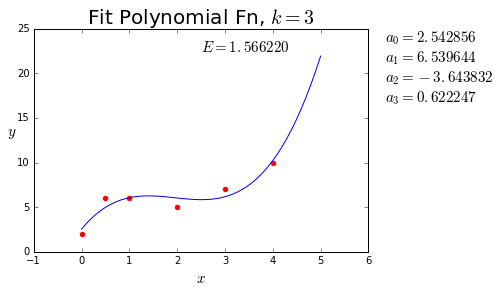

In [9]:
k = 3

# shape = (N,1+k)
#X = np.matrix([np.ones(N), x]).T
#X = np.matrix([np.ones(N), np.power(x, 1), np.power(x, 2), np.power(x, 3)]).T
X = buildX(x, k)

# shape = (k+1,1)
a = fit(X, y)

plot(input, a)

print u'X = '
print X.astype(int)


# Least Square Method - Polynomial + Gradient Descent

In [10]:
def plot_GD(epoch, a, x, y, err):
    fig = plt.figure()
    ax = fig.add_subplot(111)
    
    xx = np.linspace(0, 5)
    yy = evaluate(a, np.matrix(xx).T)
    
    ax.plot(xx, yy, color='b')
    ax.scatter(x, y, color='r')
    ax.set_title(u'Fit Polynomial Fn w/ Gradient Descent Method, Epoch = %d' % epoch)
    ax.set_xlabel(u'$x$', fontsize=15)
    ax.set_ylabel(u'$y$', fontsize=15, rotation='horizontal')
    ax.text(1.05, 1, '\n'.join('$a_%d = %f$' % (i, a[i]) for i in range(a.shape[0])), 
            transform=ax.transAxes, verticalalignment='top', fontsize=15)
    
    ax.text(0.5, 0.9, u'$E = %f$' % err, fontsize=15, transform=ax.transAxes)

    plt.show()
    
def fit_GD(X, y, epoch, mu):
    
    a = np.zeros([X.shape[1], 1])
    
    E = 0
    
    for i in range(epoch):
        
        f = X.dot(a)
        e = y - f
        E = 0.5 * np.sum(np.power(e, 2))

        if (i % (epoch / 10) == 0):
            plot_GD(i, a, X[:, 1], y, E)

        gradE = - e.T.dot(X).T
        
        a -= mu * gradE.sum(1)


    plot_GD(epoch, a, X[:, 1], y, E)
    
    return a

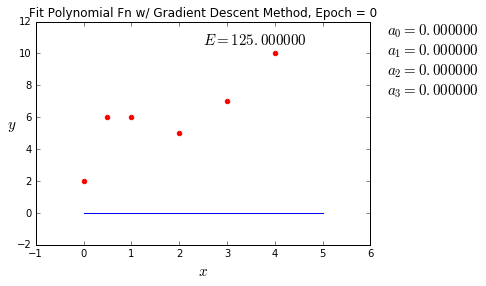

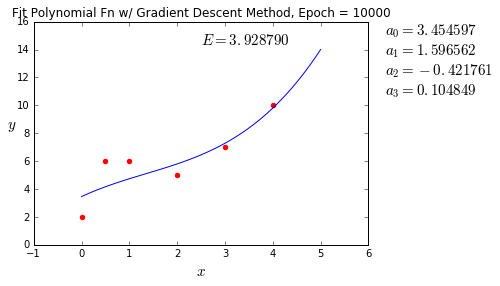

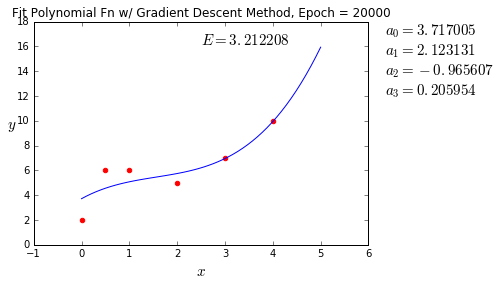

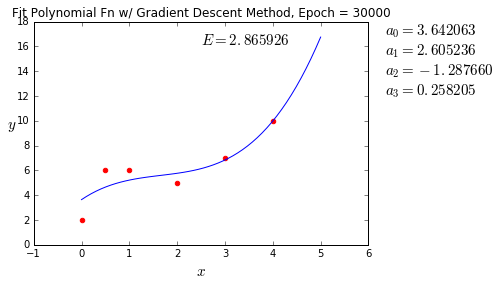

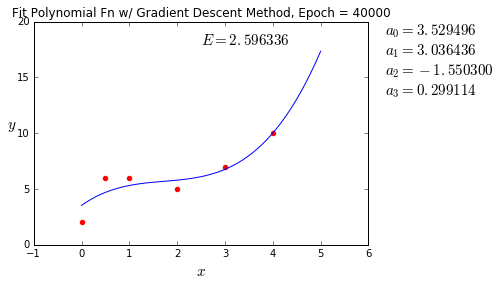

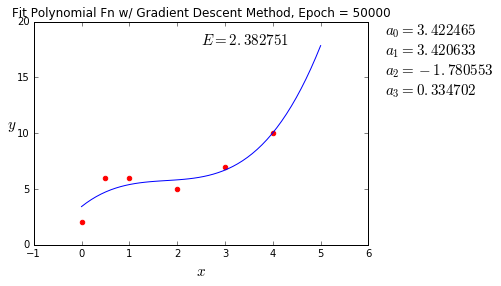

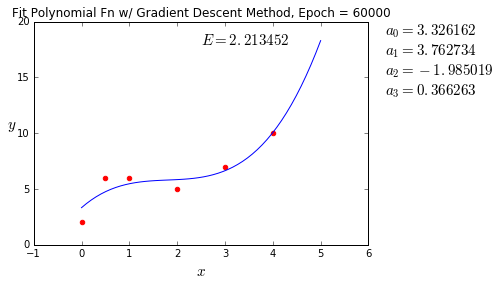

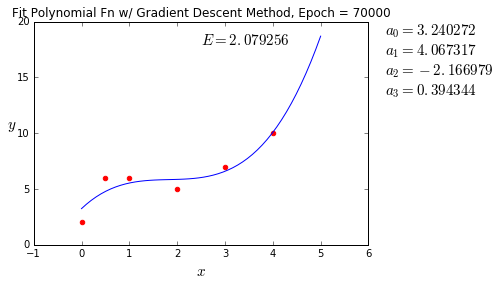

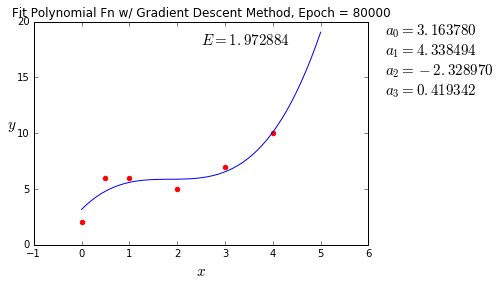

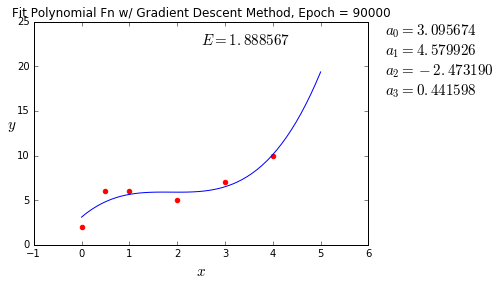

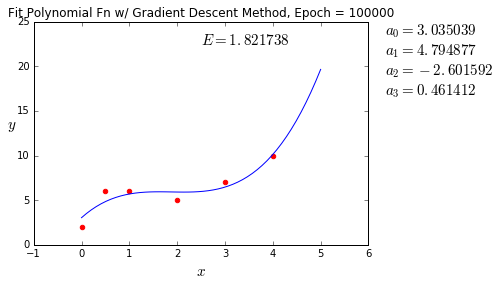

In [12]:
#a = np.zeros([k+1, 1])

mu = 0.0001

epoch = 100000

a = fit_GD(X, y, epoch, mu)

# Logistic Regression

[참고](http://aimotion.blogspot.kr/2011/11/machine-learning-with-python-logistic.html)

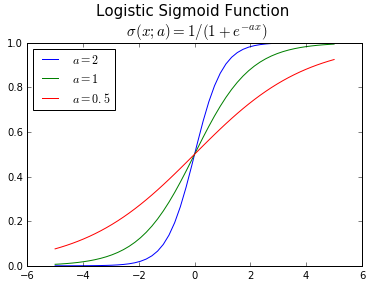

In [85]:
def sigmoid(x):
    return 1 / (1 + np.exp(-1 * x))

test_x = np.linspace(-5, 5)
ax = plt.figure().add_subplot(111)
ax.plot(test_x, sigmoid(2 * test_x), label='$a=2$')
ax.plot(test_x, sigmoid(test_x), label='$a=1$')
ax.plot(test_x, sigmoid(0.5 * test_x), label='$a=0.5$')
ax.set_title(u'Logistic Sigmoid Function \n $\sigma (x;a) = 1/(1 + e^{-ax})$', fontsize=15)
ax.legend(loc=2)

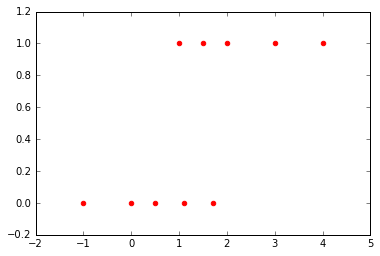

In [13]:
input = np.array([
    [-1, 0],
    [0, 0],
    [0.5, 0],
    [1, 1],
    [1.1, 0],
    [1.5, 1],
    [1.7, 0],
    [2, 1],
    [3, 1],
    [4, 1],
    #[5, 100],
])

plt.figure(1)

plt.scatter(input[:,0], input[:,1], color='r')

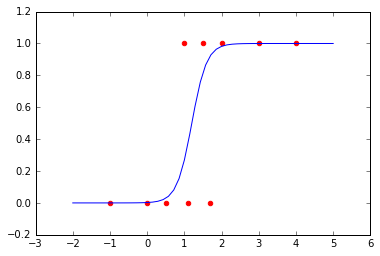

In [14]:
plt.figure(1)
xx = np.linspace(-2, 5)
yy = 1 / (1 + np.exp(- (5 * (xx - 1.2))))
plt.plot(xx, yy.T, color='b')

plt.scatter(input[:,0], input[:,1], color='r')

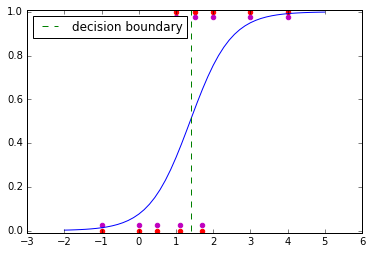

In [98]:
y = (input[:,1] - 0.5) * 0.95 + 0.5

liny = - np.log(1 / y - 1)

x = input[:,0]

X = np.matrix([np.ones(input.shape[0]), x]).T
linY = np.matrix(liny).T
a = np.linalg.inv(X.T.dot(X)).dot(X.T).dot(linY)

xx = np.linspace(-2, 5)
linyy = np.array(a[0] + a[1] * xx)
yy = 1 / (1 + np.exp(-linyy))


ax = plt.figure().add_subplot(111)
ax.plot(xx, yy.T, color='b')
ax.scatter(input[:,0], input[:,1], color='r')
ax.scatter(input[:,0], y, color='m')
ax.set_ylim([-0.01, 1.01])
ax.plot([1.4, 1.4], [-1, 3], '--', color='g', label='decision boundary')
ax.legend(loc=2)

In [114]:
a

matrix([[-9.27872957],
        [ 3.02586286]])

# Linearly Separable

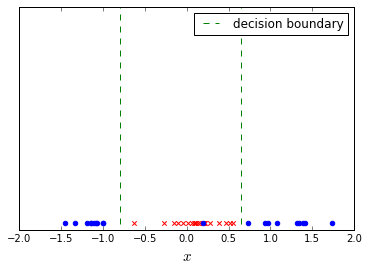

In [4]:
np.random.seed(9)

ax = plt.figure().add_subplot(111)

N = 10
x1 = 0.3 * np.random.randn(N) - 1
x2 = 0.3 * np.random.randn(2 * N)
x3 = 0.3 * np.random.randn(N) + 1
ax.scatter(x1, np.zeros(N), marker='o', color='b')
ax.scatter(x2, np.zeros(2 * N), marker='x', color='r')
ax.scatter(x3, np.zeros(N), marker='o', color='b')
ax.set_ylim(-0.1,3)
ax.set_xlabel('$x$', fontsize=15)
ax.set_yticks([])

ax.plot([-0.8, -0.8], [-1, 3], '--', color='g')
ax.plot([0.65, 0.65], [-1, 3], '--', color='g', label='decision boundary')
ax.legend()

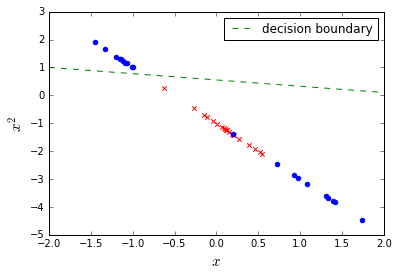

In [10]:
def plotDecisionBoundary2D(x1, x2, x3, f_x):
    ax = plt.figure().add_subplot(111)

    ax.scatter(x1, f_x(x1), marker='o', color='b')
    ax.scatter(x2, f_x(x2), marker='x', color='r')
    ax.scatter(x3, f_x(x3), marker='o', color='b')
    ax.set_xlim(-2,2)
    #ax.set_ylim(-0.1,3)
    ax.set_xlabel('$x$', fontsize=15)
    ax.set_ylabel('$x^2$', fontsize=15)

    ax.plot([-2.0, 2.0], [1, 0.1], '--', color='g', label='decision boundary')
    ax.legend()
    
f_x_1 = (lambda x: -2 * x - 1)
plotDecisionBoundary2D(x1, x2, x3, f_x_1)

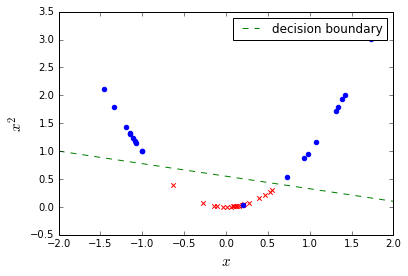

In [9]:

f_x_2 = (lambda x: np.power(x,2))
plotDecisionBoundary2D(x1, x2, x3, f_x_2)

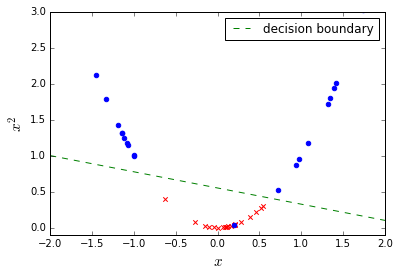

In [78]:
ax = plt.figure().add_subplot(111)

ax.scatter(x1, np.power(x1,2), marker='o', color='b')
ax.scatter(x2, np.power(x2,2), marker='x', color='r')
ax.scatter(x3, np.power(x3,2), marker='o', color='b')
ax.set_xlim(-2,2)
ax.set_ylim(-0.1,3)
ax.set_xlabel('$x$', fontsize=15)
ax.set_ylabel('$x^2$', fontsize=15)

ax.plot([-2.0, 2.0], [1, 0.1], '--', color='g', label='decision boundary')
ax.legend()